# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Modules

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras

# Data Input

## Training Data

In [3]:
train_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/traindf.csv'
traindf = pd.read_csv(train_path)
traindf

,train_num,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,1,0,129.750,93.0025,100.3390,110.674,81.2522,112.052,82.7128,159.050,122.360,156.149,120.9070,110.647,125.3670,147.350,148.832,159.177,93.0248,192.860,76.9009,194.327,79.8357,253.064,65.1461,322.130,109.1970,191.384,132.688,241.359,145.934,298.645,123.879,87.1549,132.670,87.1976,104.7750,84.1977,0.000,0.000,170.915,305.958,170.838,300.126,140.042,307.407,75.3824,336.832,63.7010,335.419,63.6352,326.515,0
1,1,0,727.456,145.8320,768.5350,170.812,752.4320,173.792,736.2860,217.917,709.785,241.298,781.8110,167.926,770.0150,222.267,721.523,217.930,793.4870,251.641,780.3770,251.656,759.7700,307.456,758.2650,363.251,805.2590,251.618,787.657,323.593,803.865,395.552,0.000,0.0000,733.248,135.6420,0.0000,0.0000,748.068,135.547,781.805,407.335,792.115,410.273,809.708,402.898,726.0100,370.636,728.9310,369.067,764.2030,372.030,1
2,1,1,123.918,90.0953,97.4535,110.638,78.3368,110.694,84.2120,157.675,122.369,154.712,112.1590,109.199,112.1030,144.399,135.665,157.678,90.0843,191.397,76.8987,194.305,84.2163,253.118,65.1487,322.124,101.8970,185.563,125.376,239.895,139.992,297.134,122.334,87.0665,125.376,87.0963,100.4010,81.3016,0.000,0.000,166.455,300.064,163.503,298.540,134.195,301.606,76.8289,336.820,65.1386,336.788,63.6144,326.529,0
3,1,1,726.029,148.8430,768.5860,172.323,752.4020,178.187,736.2840,217.875,709.869,241.388,783.2800,170.810,771.5510,226.688,721.621,222.269,795.0190,251.574,781.8720,251.588,759.7730,307.407,758.2910,363.245,806.8200,250.174,786.235,323.600,803.867,395.547,724.561,145.8630,731.862,144.3660,0.0000,0.0000,748.037,137.090,781.769,407.319,792.077,410.265,809.726,402.904,726.0120,370.628,728.9390,369.064,765.6680,370.651,1
4,1,2,123.852,90.0663,95.9295,110.624,78.3130,112.055,85.6596,157.651,122.376,156.148,110.6010,109.162,109.1510,145.818,132.661,157.655,88.6849,191.399,76.9057,194.318,85.6388,253.104,65.1416,322.116,101.8140,185.561,123.886,239.891,134.181,297.105,120.892,85.6925,123.939,87.0794,98.9412,81.2830,0.000,0.000,160.584,300.122,159.106,298.573,128.242,301.566,76.8172,336.799,65.1272,335.411,63.5997,326.519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,8,634,806.801,156.1100,852.3290,194.299,827.3470,197.331,817.0170,239.871,780.346,238.362,878.7360,188.489,906.6450,239.911,850.761,266.306,866.9760,305.958,849.3170,307.408,840.5550,382.285,836.1200,452.836,887.5400,305.943,889.043,392.642,908.096,474.796,0.000,0.0000,815.553,147.3300,0.0000,0.0000,839.052,156.197,875.755,486.622,887.504,489.551,916.884,480.717,793.6000,457.255,799.4220,452.886,840.6070,464.519,1
13495,8,635,122.367,192.8760,88.6329,194.350,78.3537,201.704,88.6612,241.348,134.193,229.677,98.9221,188.474,100.3460,213.473,119.459,226.673,57.7507,245.773,44.5489,251.574,78.3776,300.057,53.4066,370.637,69.5520,241.401,110.590,286.845,110.584,333.879,117.966,185.5190,123.856,184.1400,100.3220,181.1370,0.000,0.000,137.062,338.279,134.161,335.327,100.409,341.216,79.8259,382.370,72.4749,385.273,44.5860,380.816,0
13496,8,635,809.719,154.7140,853.8190,194.296,828.8750,197.318,827.2990,241.327,790.628,241.416,880.1980,189.928,906.6520,241.318,850.764,266.371,866.9910,307.437,849.3490,307.451,840.5530,382.295,836.1070,452.829,887.5430,307.448,891.929,394.058,906.643,474.812,0.000,0.0000,816.996,147.3160,0.0000,0.0000,840.484,157.578,874.353,486.626,886.081,489.562,913.983,482.204,793.5460,457.239,797.9510,452.888,840.6070,463.162,1
13497,8,636,120.917,186.9980,87.1497,192.807,76.9312,198.775,100.4400,232.530,142.973,228.175,94.5098,182.561,98.8271,206.103,112.192,217.871,54.8714,245.769,43.0973,250.160,76.8428,298.694,53.3596,370.658,66.6436,242.798,103.329,286.894,107.707

## Test Data

In [4]:
test_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/testdf.csv'
testdf = pd.read_csv(test_path)
testdf

,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,0,88.6254,110.649,60.6934,140.026,51.8244,139.999,41.6185,194.305,95.9383,192.951,68.0543,141.470,70.9947,192.927,88.5726,236.921,65.0689,236.921,53.3649,238.405,48.9575,307.440,40.2053,382.395,75.4330,233.996,93.0425,288.394,98.8252,348.570,84.1992,101.869,88.6784,101.848,63.5674,103.309,0.000,0.000,126.789,355.864,123.862,348.613,88.6430,357.424,68.0445,394.160,60.6871,398.502,32.7996,392.654,0
1,0,781.8240,135.619,827.2930,172.341,861.1210,173.817,887.5350,223.745,887.5900,239.858,792.0560,170.854,748.0420,216.400,698.1010,206.097,825.8800,288.349,843.4780,289.799,817.0080,363.224,806.7620,423.440,805.3220,288.342,800.8840,367.593,825.8580,448.400,0.0000,0.000,789.1590,129.737,0.0000,0.000,806.808,135.576,792.015,455.775,797.941,463.052,834.6580,454.286,781.8150,421.981,786.2060,419.027,806.7960,429.282,1
2,1,88.5546,112.059,59.2238,141.471,51.8261,141.459,41.6979,194.324,97.4413,192.929,66.5643,141.483,66.6086,192.872,87.1791,228.130,65.1163,235.456,53.4398,238.367,50.3942,308.861,40.2093,382.392,76.8115,232.531,90.0676,288.405,97.4084,347.153,84.1768,104.750,88.6304,104.791,62.1845,103.323,0.000,0.000,125.366,354.444,123.826,348.594,88.5802,357.373,68.0353,394.151,59.2585,398.492,32.7983,392.654,0
3,1,781.7530,135.694,827.3010,172.380,862.5580,172.383,887.6020,225.166,897.7500,238.391,792.0110,172.320,746.5510,217.914,698.0910,204.670,825.8290,288.380,842.0120,289.821,809.6800,366.200,805.3510,417.645,805.2990,288.382,802.3310,369.139,827.2500,448.416,0.0000,0.000,787.6660,131.230,0.0000,0.000,806.787,135.628,792.038,457.209,799.404,463.065,834.6870,452.902,780.3330,420.553,783.2630,417.635,806.8030,426.382,1
4,2,87.2117,112.082,57.7781,142.938,50.4392,142.944,44.5781,194.391,95.9745,192.933,65.1753,141.512,69.5092,192.883,88.5841,228.171,65.1666,235.468,54.8233,238.380,50.4429,307.456,40.2146,382.386,76.8830,232.541,90.0774,288.371,97.3710,347.139,82.7490,104.794,88.6130,106.232,62.1732,104.763,0.000,0.000,125.334,354.441,122.448,348.589,88.5594,357.368,66.6351,394.149,59.2328,398.488,32.8050,392.642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,886,0.0000,0.000,925.7490,184.052,889.0150,188.452,853.7350,229.627,850.7500,282.476,959.5440,182.561,0.0000,0.000,0.0000,0.000,915.4340,298.568,896.3160,292.770,894.8620,370.552,847.8980,430.829,935.9960,300.087,908.1070,373.548,866.9640,439.595,959.5480,134.091,0.0000,0.000,934.6140,135.616,0.000,0.000,888.992,466.100,890.490,463.059,862.5160,442.577,852.3490,464.555,842.0140,461.605,837.5900,432.304,1
1771,887,85.6870,123.922,65.0654,157.682,40.1876,159.097,40.1562,207.563,51.8368,254.568,88.6171,157.616,90.0859,194.350,87.1099,209.028,62.1370,254.564,41.6670,256.038,51.9625,322.155,46.0271,397.036,76.8512,253.124,88.5558,313.303,79.8376,370.657,76.8307,120.908,87.1418,120.869,54.8663,122.454,0.000,0.000,112.076,380.907,110.593,377.953,75.3187,380.849,65.0672,416.039,53.3912,416.117,41.6105,405.794,0
1772,887,0.0000,0.000,933.0040,182.667,899.2420,185.519,858.1650,229.623,850.8280,286.815,959.5450,182.622,0.0000,0.000,0.0000,0.000,921.3690,298.608,900.7680,295.693,906.6090,370.608,862.5790,441.135,943.3220,300.093,919.8240,370.567,872.8040,439.574,959.5610,135.563,0.0000,0.000,944.8440,135.638,0.000,0.000,896.353,467.535,894.894,463.142,855.2360,441.041,881.6570,473.349,865.5270,470.430,850.8190,445.493,1
1773,888,85.6622,123.916,65.1285,157.667,41.6431,159.077,43.1247,206.133,56.3038,253.056,88.6056,157.635,91.5328,197.292,87.0729,209.017,63.5729,253.127,44.5511,254.575,53.3689,322.113,47.4655,397.048,76.8868,253.049,88.6215,311.894,81.2913,372.037,76.8004,120.907,87.1332,119.476,54.8602,122.442,0.000,0.000

# Data Preprocessing

## Training Data

### Normalization

In [ ]:
norm_cols = traindf.columns[2:-1]
tmpdf = traindf[norm_cols]
X_cols = norm_cols[::2]
Y_cols = norm_cols[1::2]
tmpdf[X_cols]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,129.750,100.3390,81.2522,82.7128,122.360,120.9070,125.3670,148.832,93.0248,76.9009,79.8357,65.1461,109.1970,132.688,145.934,123.879,132.670,104.7750,0.000,170.915,170.838,140.042,75.3824,63.7010,63.6352
1,727.456,768.5350,752.4320,736.2860,709.785,781.8110,770.0150,721.523,793.4870,780.3770,759.7700,758.2650,805.2590,787.657,803.865,0.000,733.248,0.0000,748.068,781.805,792.115,809.708,726.0100,728.9310,764.2030
2,123.918,97.4535,78.3368,84.2120,122.369,112.1590,112.1030,135.665,90.0843,76.8987,84.2163,65.1487,101.8970,125.376,139.992,122.334,125.376,100.4010,0.000,166.455,163.503,134.195,76.8289,65.1386,63.6144
3,726.029,768.5860,752.4020,736.2840,709.869,783.2800,771.5510,721.621,795.0190,781.8720,759.7730,758.2910,806.8200,786.235,803.867,724.561,731.862,0.0000,748.037,781.769,792.077,809.726,726.0120,728.9390,765.6680
4,123.852,95.9295,78.3130,85.6596,122.376,110.6010,109.1510,132.661,88.6849,76.9057,85.6388,65.1416,101.8140,123.886,134.181,120.892,123.939,98.9412,0.000,160.584,159.106,128.242,76.8172,65.1272,63.5997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,806.801,852.3290,827.3470,817.0170,780.346,878.7360,906.6450,850.761,866.9760,849.3170,840.5550,836.1200,887.5400,889.043,908.096,0.000,815.553,0.0000,839.052,875.755,887.504,916.884,793.6000,799.4220,840.6070
13495,122.367,88.6329,78.3537,88.6612,134.193,98.9221,100.3460,119.459,57.7507,44.5489,78.3776,53.4066,69.5520,110.590,110.584,117.966,123.856,100.3220,0.000,137.062,134.161,100.409,79.8259,72.4749,44.5860
13496,809.719,853.8190,828.8750,827.2990,790.628,880.1980,906.6520,850.764,866.9910,849.3490,840.5530,836.1070,887.5430,891.929,906.643,0.000,816.996,0.0000,840.484,874.353,886.081,913.983,793.5460,797.9510,840.6070
13497,120.917,87.1497,76.9312,100.4400,142.973,94.5098,98.8271,112.192,54.8714,43.0973,76.8428,53.3596,66.6436,103.329,107.707,113.622,122.388,98.8195,0.000,135.559,132.680,100.343,78.3669,70.9878,44.5599


### Split Data to Left and Right

In [5]:
left_traindf = traindf[traindf['left/right'] == 0].reset_index(drop=True)
left_traindf

,train_num,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,1,0,129.750,93.0025,100.3390,110.674,81.2522,112.052,82.7128,159.050,122.360,156.149,120.9070,110.647,125.3670,147.350,148.832,159.177,93.0248,192.860,76.9009,194.327,79.8357,253.064,65.1461,322.130,109.1970,191.384,132.688,241.359,145.934,298.645,123.879,87.1549,132.670,87.1976,104.7750,84.1977,0.0,0.0,170.915,305.958,170.838,300.126,140.042,307.407,75.3824,336.832,63.7010,335.419,63.6352,326.515,0
1,1,1,123.918,90.0953,97.4535,110.638,78.3368,110.694,84.2120,157.675,122.369,154.712,112.1590,109.199,112.1030,144.399,135.665,157.678,90.0843,191.397,76.8987,194.305,84.2163,253.118,65.1487,322.124,101.8970,185.563,125.376,239.895,139.992,297.134,122.334,87.0665,125.376,87.0963,100.4010,81.3016,0.0,0.0,166.455,300.064,163.503,298.540,134.195,301.606,76.8289,336.820,65.1386,336.788,63.6144,326.529,0
2,1,2,123.852,90.0663,95.9295,110.624,78.3130,112.055,85.6596,157.651,122.376,156.148,110.6010,109.162,109.1510,145.818,132.661,157.655,88.6849,191.399,76.9057,194.318,85.6388,253.104,65.1416,322.116,101.8140,185.561,123.886,239.891,134.181,297.105,120.892,85.6925,123.939,87.0794,98.9412,81.2830,0.0,0.0,160.584,300.122,159.106,298.573,128.242,301.566,76.8172,336.799,65.1272,335.411,63.5997,326.519,0
3,1,3,123.800,90.0764,93.0319,110.666,78.3185,112.114,85.7034,159.063,122.384,157.635,109.1360,109.179,103.3250,147.306,128.274,162.070,88.6576,191.394,76.9045,194.307,87.0590,253.076,65.1634,322.084,100.4080,185.558,123.804,239.888,126.824,294.196,119.416,85.7047,123.903,87.0782,98.8748,82.7196,0.0,0.0,154.717,300.114,151.753,298.573,122.361,300.065,76.8114,336.793,65.1279,335.391,63.6170,325.085,0
4,1,4,122.437,90.0996,91.5839,110.703,78.3300,112.171,87.1090,159.087,122.429,159.093,107.6770,109.186,101.8060,147.377,123.863,167.876,88.6029,191.395,76.8604,192.933,87.1237,253.136,65.1664,322.064,100.3450,185.573,122.315,239.894,122.380,294.240,116.534,87.0728,123.873,87.0957,98.8433,84.1976,0.0,0.0,148.833,303.058,147.321,300.071,112.160,300.104,76.8094,336.802,65.1370,335.394,63.6106,325.049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,8,632,131.194,204.5520,98.8103,204.603,79.8269,204.654,50.4340,242.871,100.389,239.916,112.0520,203.118,104.7790,225.169,117.970,231.053,65.1484,251.577,51.8832,253.074,85.6481,300.170,54.8757,370.636,79.8242,247.237,122.410,285.432,112.078,333.884,125.382,194.4090,134.147,195.8020,110.5990,188.5060,0.0,0.0,138.565,338.270,135.621,335.336,101.858,339.763,82.7640,382.331,75.3589,383.854,48.9311,380.797,0
6706,8,633,128.270,200.2230,95.9334,200.215,79.7897,203.164,63.6698,247.239,110.578,238.437,109.1840,195.838,104.7650,217.882,122.311,235.461,65.0628,251.631,48.9566,253.084,85.6268,300.134,54.8499,370.627,78.3831,250.119,119.422,286.830,112.054,333.879,123.891,192.9150,134.066,194.2970,107.7240,185.5450,0.0,0.0,138.532,338.297,135.603,335.353,101.826,341.192,81.3075,382.344,73.9475,383.865,48.9253,379.420,0
6707,8,634,123.902,194.4020,91.5560,197.271,78.3539,201.720,76.8794,245.789,113.621,238.353,104.7670,194.317,101.8720,216.403,123.817,229.538,62.1613,250.157,46.0517,251.692,82.7393,300.135,53.4346,370.628,75.4086,244.308,112.191,286.866,110.671,333.915,122.374,191.3870,128.278,191.4090,103.2900,182.6100,0.0,0.0,137.107,339.741,135.576,335.378,101.811,341.211,81.2894,382.358,73.9241,385.250,46.0124,380.796,0
6708,8,635,122.367,192.8760,88.6329,194.350,78.3537,201.704,88.6612,241.348,134.193,229.677,98.9221,188.474,100.3460,213.473,119.459,226.673,57.7507,245.773,44.5489,251.574,78.3776,300.057,53.4066,370.637,69.5520,241.401,110.590,286.845,110.584,333.879,117.966,185.5190,123.856,184.1400,100.3220,181.1370,0.0,0.0,137.06

In [6]:
right_traindf = traindf[traindf['left/right'] == 1].reset_index(drop=True)
right_traindf

,train_num,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,1,0,727.456,145.832,768.535,170.812,752.432,173.792,736.286,217.917,709.785,241.298,781.811,167.926,770.015,222.267,721.523,217.930,793.487,251.641,780.377,251.656,759.770,307.456,758.265,363.251,805.259,251.618,787.657,323.593,803.865,395.552,0.000,0.000,733.248,135.642,0.0,0.0,748.068,135.547,781.805,407.335,792.115,410.273,809.708,402.898,726.010,370.636,728.931,369.067,764.203,372.030,1
1,1,1,726.029,148.843,768.586,172.323,752.402,178.187,736.284,217.875,709.869,241.388,783.280,170.810,771.551,226.688,721.621,222.269,795.019,251.574,781.872,251.588,759.773,307.407,758.291,363.245,806.820,250.174,786.235,323.600,803.867,395.547,724.561,145.863,731.862,144.366,0.0,0.0,748.037,137.090,781.769,407.319,792.077,410.265,809.726,402.904,726.012,370.628,728.939,369.064,765.668,370.651,1
2,1,2,726.011,151.787,768.607,173.789,750.990,179.661,734.816,217.862,711.243,242.814,784.713,170.874,774.441,228.146,723.035,225.177,795.071,251.585,783.282,251.585,759.775,307.421,758.293,363.264,808.265,251.569,786.223,323.587,803.879,395.561,723.153,147.268,731.817,145.848,0.0,0.0,746.621,140.007,781.775,407.311,792.067,410.256,811.157,402.923,726.001,370.620,728.938,369.059,767.071,370.663,1
3,1,3,725.984,154.704,768.630,173.820,752.408,179.656,734.806,216.423,711.252,242.826,786.183,170.905,778.818,228.183,723.107,226.662,795.052,251.647,781.879,251.630,759.794,308.868,758.281,363.262,808.265,251.651,787.674,323.616,803.885,395.541,0.000,0.000,730.391,145.935,0.0,0.0,746.554,144.371,781.845,405.899,792.129,408.792,811.158,402.893,727.436,370.613,730.367,369.054,765.649,370.674,1
4,1,4,724.585,156.137,768.612,173.832,750.947,179.672,733.372,216.334,711.245,241.430,786.215,170.926,780.312,229.581,724.528,228.078,796.497,251.632,783.258,251.614,759.818,308.875,758.288,363.252,811.180,251.635,789.156,323.606,803.877,395.555,723.069,147.421,730.406,147.316,0.0,0.0,746.559,144.422,781.829,405.883,792.113,408.785,811.143,402.914,726.019,370.607,730.361,369.048,765.661,370.664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,8,632,803.867,156.199,850.807,194.293,822.922,200.222,800.904,235.487,764.199,225.203,875.831,185.576,906.639,239.831,850.797,264.910,867.014,304.499,849.303,307.424,839.123,380.849,837.587,451.379,888.994,303.022,890.454,392.585,909.541,474.865,0.000,0.000,809.727,147.372,0.0,0.0,834.687,156.189,877.270,493.969,890.466,496.911,919.855,482.217,795.017,457.229,800.872,452.848,842.045,463.054,1
6785,8,633,805.315,156.132,852.236,192.950,825.847,198.742,805.363,238.385,770.010,229.552,877.273,187.035,906.647,239.861,850.804,264.927,867.002,305.970,849.318,307.443,840.511,380.904,837.555,452.784,887.589,304.510,889.052,392.610,909.501,474.845,0.000,0.000,814.073,147.346,0.0,0.0,837.595,156.191,875.776,488.098,887.541,492.474,919.792,482.205,795.000,457.215,799.445,452.855,842.009,463.123,1
6786,8,634,806.801,156.110,852.329,194.299,827.347,197.331,817.017,239.871,780.346,238.362,878.736,188.489,906.645,239.911,850.761,266.306,866.976,305.958,849.317,307.408,840.555,382.285,836.120,452.836,887.540,305.943,889.043,392.642,908.096,474.796,0.000,0.000,815.553,147.330,0.0,0.0,839.052,156.197,875.755,486.622,887.504,489.551,916.884,480.717,793.600,457.255,799.422,452.886,840.607,464.519,1
6787,8,635,809.719,154.714,853.819,194.296,828.875,197.318,827.299,241.327,790.628,241.416,880.198,189.928,906.652,241.318,850.764,266.371,866.991,307.437,849.349,307.451,840.553,382.295,836.107,452.829,887.543,307.448,891.929,394.058,906.643,474.812,0.000,0.000,816.996,147.316,0.0,0.0,840.484,157.578,874.353,486.626,886.081,489.562,913.983,482.204,793.546,457.239,797.951,452

### Combination with Labels

In [6]:
right_label_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/rightlabel.csv'
right_labeldf = pd.read_csv(right_label_path)

left_label_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/leftlabel.csv'
left_labeldf = pd.read_csv(left_label_path)

In [7]:
columns =  ['train_num', 'file_num']
for i in range(25):
    X = 'X' + str(i)
    Y = 'Y' + str(i)
    columns += [X, Y]
columns += ['left/right']

#### Right

In [16]:
ls = []
ii = []
for index, row in right_labeldf.iterrows():
    train_num = row['train_num']
    file_num = row['file_num']
    tmp = right_traindf[right_traindf['train_num'] == train_num]
    tmpls = []
    for i, r in tmp.iterrows():
        if (r['file_num'] - file_num <= 15) and (r['file_num'] - file_num >= 0):
            tmpls.append(r[2:-1].tolist())
    if len(tmpls) == 16:
        ls.append(tmpls)
    else:
        # print(index)
        ii += [index]

In [18]:
right_trainx = np.array(ls)
right_trainx.shape

(193, 16, 50)

In [17]:
right_labeldf = right_labeldf.drop(ii).reset_index(drop=True)
right_labeldf

,train_num,file_num,left/right,fore/back
0,1,6,1,0
1,1,39,1,0
2,1,69,1,0
3,1,96,1,0
4,1,123,1,0
...,...,...,...,...
188,6,353,1,1
189,6,381,1,0
190,6,408,1,0
191,6,441,1,1


In [19]:
from tensorflow import keras

right_trainy = right_labeldf['fore/back']
right_trainy = right_trainy.to_numpy()
right_trainy = np.expand_dims(right_trainy, -1)

right_trainy = keras.utils.to_categorical(right_trainy)

right_trainy.shape

(193, 2)

#### Left

In [8]:
ls = []
ii = []
for index, row in left_labeldf.iterrows():
    train_num = row['train_num']
    file_num = row['file_num']
    tmp = left_traindf[left_traindf['train_num'] == train_num]
    tmpls = []
    for i, r in tmp.iterrows():
        if (r['file_num'] - file_num <= 15) and (r['file_num'] - file_num >= 0):
            tmpls.append(r[2:-1].tolist())
    if len(tmpls) == 16:
        ls.append(tmpls)
    else:
        # print(index)
        ii += [index]

In [9]:
left_trainx = np.array(ls)
left_trainx.shape

(129, 16, 50)

In [10]:
left_labeldf = left_labeldf.drop(ii).reset_index(drop=True)
left_labeldf

,train_num,file_num,left/right,fore/back
0,1,21,0,0
1,1,81,0,0
2,1,138,0,0
3,1,162,0,0
4,1,198,0,0
...,...,...,...,...
124,6,335,0,1
125,6,367,0,1
126,6,395,0,1
127,6,423,0,1


In [11]:
left_trainy = left_labeldf['fore/back']
left_trainy = left_trainy.to_numpy()
left_trainy = np.expand_dims(left_trainy, -1)

left_trainy = keras.utils.to_categorical(left_trainy)

left_trainy.shape

(129, 2)

## Test Data

### Split Data to Left and Right

In [12]:
left_testdf = testdf[testdf['left/right'] == 0].reset_index(drop=True)
left_testdf

,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,0,88.6254,110.649,60.6934,140.026,51.8244,139.999,41.6185,194.305,95.9383,192.951,68.0543,141.470,70.9947,192.927,88.5726,236.921,65.0689,236.921,53.3649,238.405,48.9575,307.440,40.2053,382.395,75.4330,233.996,93.0425,288.394,98.8252,348.570,84.1992,101.869,88.6784,101.848,63.5674,103.309,0.0,0.0,126.789,355.864,123.862,348.613,88.6430,357.424,68.0445,394.160,60.6871,398.502,32.7996,392.654,0
1,1,88.5546,112.059,59.2238,141.471,51.8261,141.459,41.6979,194.324,97.4413,192.929,66.5643,141.483,66.6086,192.872,87.1791,228.130,65.1163,235.456,53.4398,238.367,50.3942,308.861,40.2093,382.392,76.8115,232.531,90.0676,288.405,97.4084,347.153,84.1768,104.750,88.6304,104.791,62.1845,103.323,0.0,0.0,125.366,354.444,123.826,348.594,88.5802,357.373,68.0353,394.151,59.2585,398.492,32.7983,392.654,0
2,2,87.2117,112.082,57.7781,142.938,50.4392,142.944,44.5781,194.391,95.9745,192.933,65.1753,141.512,69.5092,192.883,88.5841,228.171,65.1666,235.468,54.8233,238.380,50.4429,307.456,40.2146,382.386,76.8830,232.541,90.0774,288.371,97.3710,347.139,82.7490,104.794,88.6130,106.232,62.1732,104.763,0.0,0.0,125.334,354.441,122.448,348.589,88.5594,357.368,66.6351,394.149,59.2328,398.488,32.8050,392.642,0
3,3,87.2153,112.103,57.7732,142.958,50.4236,142.939,46.0332,195.821,97.4057,192.931,66.5581,142.962,69.5462,192.907,88.6368,228.158,66.6217,236.968,56.3067,239.845,51.8523,308.883,41.5556,382.388,78.3352,234.029,91.5265,288.336,97.3941,347.133,82.7488,106.244,88.6152,106.250,62.1757,104.782,0.0,0.0,125.339,354.419,123.815,348.578,88.5784,357.366,66.6373,394.150,59.2463,398.492,32.8078,392.642,0
4,4,88.5660,112.123,57.7982,142.948,50.4408,142.960,48.9518,195.859,98.9365,194.314,66.5759,142.922,72.4688,194.356,90.0704,228.191,66.6409,238.397,56.3387,239.887,51.8956,307.451,41.5605,382.381,78.3448,235.475,97.3857,286.807,97.4464,347.068,82.7684,107.700,88.6268,106.245,62.1804,107.671,0.0,0.0,125.327,354.406,123.827,348.554,88.6088,355.924,66.6418,394.148,59.2430,398.481,32.8112,392.626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,884,85.6506,125.336,63.5710,159.121,32.8044,160.583,18.1953,210.490,28.3671,258.979,88.6854,157.672,88.6396,194.327,87.1536,216.330,60.7118,253.093,41.6635,254.546,51.9383,322.068,44.5598,397.008,75.4499,251.646,88.6207,311.824,78.3511,370.629,75.4598,120.940,87.1438,120.924,53.4321,122.451,0.0,0.0,112.121,379.367,110.617,372.094,72.4668,380.865,63.7002,414.628,53.3879,416.083,41.5877,404.419,0
882,885,85.6645,125.306,63.6103,159.081,37.1767,159.177,28.3741,209.023,34.2948,256.063,88.6510,157.640,88.6449,194.398,85.7050,216.314,62.1910,253.083,44.5340,253.153,51.9312,322.077,44.5990,395.605,76.8321,251.639,88.5828,311.868,79.7988,370.601,76.8041,120.918,87.1441,120.901,53.4579,122.423,0.0,0.0,112.074,380.870,110.601,376.479,73.9193,380.830,63.6998,414.630,53.3844,416.074,41.5989,404.406,0
883,886,85.6773,123.940,63.6580,159.066,38.7044,159.165,31.3573,209.022,41.6259,254.591,88.6063,157.625,88.6200,194.372,85.6989,212.006,62.1417,253.096,41.6915,254.562,51.9723,322.130,46.0152,397.025,76.8428,251.643,88.5712,311.912,79.7907,370.636,76.8137,120.913,87.1506,120.885,54.8300,122.443,0.0,0.0,112.088,380.900,110.610,377.930,73.9374,380.856,63.6925,414.658,53.3806,416.096,41.6080,405.781,0
884,887,85.6870,123.922,65.0654,157.682,40.1876,159.097,40.1562,207.563,51.8368,254.568,88.6171,157.616,90.0859,194.350,87.1099,209.028,62.1370,254.564,41.6670,256.038,51.9625,322.155,46.0271,397.036,76.8512,253.124,88.5558,313.303,79.8376,370.657,76.8307,120.908,87.1418,120.869,54.8663,122.454,0.0,0.0,112.076,380.907,110.593,377.953,75.3187,380.849,65.0672,416.039,53.3912,416.117,41.6105

In [25]:
right_testdf = testdf[testdf['left/right'] == 1].reset_index(drop=True)
right_testdf

,file_num,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,left/right
0,0,781.824,135.619,827.293,172.341,861.121,173.817,887.535,223.745,887.590,239.858,792.056,170.854,748.042,216.400,698.101,206.097,825.880,288.349,843.478,289.799,817.008,363.224,806.762,423.440,805.322,288.342,800.884,367.593,825.858,448.400,0.000,0.000,789.159,129.737,0.000,0.000,806.808,135.576,792.015,455.775,797.941,463.052,834.658,454.286,781.815,421.981,786.206,419.027,806.796,429.282,1
1,1,781.753,135.694,827.301,172.380,862.558,172.383,887.602,225.166,897.750,238.391,792.011,172.320,746.551,217.914,698.091,204.670,825.829,288.380,842.012,289.821,809.680,366.200,805.351,417.645,805.299,288.382,802.331,369.139,827.250,448.416,0.000,0.000,787.666,131.230,0.000,0.000,806.787,135.628,792.038,457.209,799.404,463.065,834.687,452.902,780.333,420.553,783.263,417.635,806.803,426.382,1
2,2,780.374,137.071,827.297,173.788,862.559,172.369,887.521,226.669,887.522,239.908,792.033,172.387,747.996,219.383,699.612,204.645,825.819,288.380,842.005,289.816,803.884,360.321,805.308,416.109,805.309,288.387,802.343,369.079,825.882,448.417,0.000,0.000,786.183,132.641,0.000,0.000,806.736,135.633,790.619,455.790,797.973,463.068,834.659,454.277,780.320,420.513,781.864,417.605,806.755,420.535,1
3,3,780.348,137.059,827.309,173.790,862.578,172.370,886.072,226.694,875.853,241.365,792.027,173.786,752.407,220.825,708.322,204.666,827.284,288.335,844.928,288.356,803.865,357.419,805.260,411.732,806.760,288.355,803.793,369.044,827.249,448.430,0.000,0.000,784.710,132.611,0.000,0.000,805.326,135.603,790.590,455.799,797.942,463.077,834.666,454.301,780.273,419.042,781.811,417.527,806.784,417.572,1
4,4,780.311,137.054,827.291,173.781,862.557,172.369,881.683,228.099,856.713,247.241,792.026,173.783,756.794,222.285,718.656,206.096,825.849,288.346,842.029,288.377,796.497,354.419,805.317,408.752,805.353,288.370,805.237,369.122,827.283,449.844,0.000,0.000,783.265,131.222,0.000,0.000,805.288,135.583,790.620,455.764,799.401,463.049,834.691,454.299,778.863,417.541,781.782,414.674,809.700,416.127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,884,959.532,144.379,913.953,185.554,875.772,187.029,850.741,231.112,849.366,283.936,959.522,184.106,0.000,0.000,0.000,0.000,900.815,298.570,877.305,295.655,864.085,369.069,831.766,416.114,925.722,300.072,899.357,377.932,866.960,441.027,947.802,134.104,959.552,135.627,921.262,135.590,0.000,0.000,890.474,466.100,891.918,463.087,856.672,446.932,837.584,449.905,825.820,442.595,827.357,416.074,1
885,885,959.554,144.441,921.259,185.545,884.557,188.463,850.872,231.049,849.365,282.478,959.537,185.536,0.000,0.000,0.000,0.000,909.614,297.164,887.495,292.767,877.291,369.170,839.066,420.501,933.055,300.058,900.801,379.365,865.566,439.591,959.536,134.157,0.000,0.000,930.150,135.563,0.000,0.000,889.036,467.520,890.503,463.081,859.621,442.535,840.602,454.290,830.295,451.335,828.840,420.539,1
886,886,0.000,0.000,925.749,184.052,889.015,188.452,853.735,229.627,850.750,282.476,959.544,182.561,0.000,0.000,0.000,0.000,915.434,298.568,896.316,292.770,894.862,370.552,847.898,430.829,935.996,300.087,908.107,373.548,866.964,439.595,959.548,134.091,0.000,0.000,934.614,135.616,0.000,0.000,888.992,466.100,890.490,463.059,862.516,442.577,852.349,464.555,842.014,461.605,837.590,432.304,1
887,887,0.000,0.000,933.004,182.667,899.242,185.519,858.165,229.623,850.828,286.815,959.545,182.622,0.000,0.000,0.000,0.000,921.369,298.608,900.768,295.693,906.609,370.608,862.579,441.135,943.322,300.093,919.824,370.567,872.804,439.574,959.561,135.563,0.000,0.000,944.844,135.638,0.000,0.000,896.353,467.535,894.894,463.142,855.236,441.041,881.657,473.349,865.527,470.430,850.819,445.493,1


### Combination with Labels

In [13]:
right_label_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/rightlabel.csv'
right_labeldf = pd.read_csv(right_label_path)
left_label_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/leftlabel.csv'
left_labeldf = pd.read_csv(left_label_path)

In [14]:
right_labeldf = right_labeldf[right_labeldf['train_num'] == 7].reset_index(drop=True)
left_labeldf = left_labeldf[left_labeldf['train_num'] == 7].reset_index(drop=True)

In [ ]:
right_labeldf

,train_num,file_num,left/right,fore/back
0,7,43,1,0
1,7,74,1,1
2,7,106,1,0
3,7,134,1,0
4,7,161,1,0
5,7,192,1,1
6,7,223,1,1
7,7,257,1,1
8,7,289,1,0
9,7,316,1,0


In [28]:
left_labeldf

,train_num,file_num,left/right,fore/back
0,7,29,0,0
1,7,58,0,0
2,7,94,0,1
3,7,119,0,0
4,7,148,0,0
5,7,177,0,1
6,7,206,0,0
7,7,242,0,0
8,7,275,0,0
9,7,302,0,0


In [15]:
columns =  ['file_num']
for i in range(25):
    X = 'X' + str(i)
    Y = 'Y' + str(i)
    columns += [X, Y]
columns += ['left/right']

#### Right

In [52]:
ls = []
ii = []
for index, row in right_labeldf.iterrows():
    # train_num = row['train_num']
    file_num = row['file_num']
    # tmp = rightdf[rightdf['train_num'] == train_num]
    tmp = right_testdf
    tmpls = []
    for i, r in tmp.iterrows():
        if (r['file_num'] - file_num <= 15) and (r['file_num'] - file_num >= 0):
            tmpls.append(r[1:-1].tolist())
    if len(tmpls) == 16:
        ls.append(tmpls)
    else:
        print(index)
        ii += [index]

In [53]:
right_testx = np.array(ls)
right_testx.shape

(28, 16, 50)

In [54]:
right_labeldf = right_labeldf.drop(ii).reset_index(drop=True)
right_labeldf

,train_num,file_num,left/right,fore/back
0,7,43,1,0
1,7,74,1,1
2,7,106,1,0
3,7,134,1,0
4,7,161,1,0
5,7,192,1,1
6,7,223,1,1
7,7,257,1,1
8,7,289,1,0
9,7,316,1,0


In [55]:
right_testy = right_labeldf['fore/back']
right_testy = right_testy.to_numpy()
right_testy = np.expand_dims(right_testy, -1)

right_testy = keras.utils.to_categorical(right_testy)

right_testy.shape

(28, 2)

#### Left

In [16]:
ls = []
ii = []
for index, row in left_labeldf.iterrows():
    # train_num = row['train_num']
    file_num = row['file_num']
    # tmp = leftdf[leftdf['train_num'] == train_num]
    tmp = left_testdf
    tmpls = []
    for i, r in tmp.iterrows():
        if (r['file_num'] - file_num <= 15) and (r['file_num'] - file_num >= 0):
            tmpls.append(r[1:-1].tolist())
    if len(tmpls) == 16:
        ls.append(tmpls)
    else:
        print(index)
        ii += [index]

19
24


In [17]:
left_testx = np.array(ls)
left_testx.shape

(26, 16, 50)

In [18]:
left_labeldf = left_labeldf.drop(ii).reset_index(drop=True)
left_labeldf

,train_num,file_num,left/right,fore/back
0,7,29,0,0
1,7,58,0,0
2,7,94,0,1
3,7,119,0,0
4,7,148,0,0
5,7,177,0,1
6,7,206,0,0
7,7,242,0,0
8,7,275,0,0
9,7,302,0,0


In [19]:
left_testy = left_labeldf['fore/back']
left_testy = left_testy.to_numpy()
left_testy = np.expand_dims(left_testy, -1)

left_testy = keras.utils.to_categorical(left_testy)

left_testy.shape

(26, 2)

# LSTM

In [20]:
from sklearn import metrics
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

## Right

In [47]:
# n_samples = 193
# n_timesteps = 16
# n_features = 50
# n_outputs = 2
n_samples = right_trainx.shape[0]
n_timesteps, n_features, n_outputs = right_trainx.shape[1], right_trainx.shape[2], right_trainy.shape[1]

In [60]:
del model

In [61]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features), return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
# model.add(SimpleRNN(128))
# model.add(Dense(100, activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 16, 100)           60400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 151,102
Trainable params: 151,102
Non-trainable params: 0
________________________________________________

In [62]:
verbose, epochs, batch_size = 1, 10, 32
# fit network
model.fit(right_trainx, right_trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/10
7/7 [==============================] - 4s 14ms/step - loss: 0.7232 - accuracy: 0.5278
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6294 - accuracy: 0.6601
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5009 - accuracy: 0.7923
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4947 - accuracy: 0.7490
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 0.3764 - accuracy: 0.8356
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.5290 - accuracy: 0.7718
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 0.3829 - accuracy: 0.8397
Epoch 8/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3530 - accuracy: 0.8341
Epoch 9/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2902 - accuracy: 0.8981
Epoch 10/10
7/7 [==============================] - 0s 13ms/step - loss: 0.3883 - accuracy: 0.8254


## Left

In [21]:
n_samples = left_trainx.shape[0]
n_timesteps, n_features, n_outputs = left_trainx.shape[1], left_trainx.shape[2], left_trainy.shape[1]

In [42]:
# del model

In [22]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features), return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
# model.add(SimpleRNN(128))
# model.add(Dense(100, activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 151,102
Trainable params: 151,102
Non-trainable params: 0
__________________________________________________

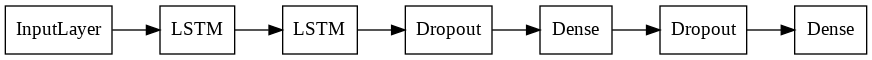

In [39]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', rankdir='LR', show_layer_names=False, )

In [40]:
verbose, epochs, batch_size = 1, 10, 32
# fit network
model.fit(left_trainx, left_trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/10
5/5 [==============================] - 21s 15ms/step - loss: 1.6287 - accuracy: 0.2780
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.9067 - accuracy: 0.3328
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6235 - accuracy: 0.6350
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6777 - accuracy: 0.7034
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6785 - accuracy: 0.7229
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.6245 - accuracy: 0.7407
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 0.5990 - accuracy: 0.7048
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6233 - accuracy: 0.6930
Epoch 9/10
5/5 [==============================] - 0s 15ms/step - loss: 0.5708 - accuracy: 0.7126
Epoch 10/10
5/5 [==============================] - 0s 13ms/step - loss: 0.5726 - accuracy: 0.6887


# Evaluation

In [63]:
pred = model.predict(right_testx)
pred = (pred >= 0.5)
from sklearn.metrics import classification_report
print(classification_report(right_testy, pred))

              precision    recall  f1-score   support

           0       0.59      0.94      0.73        17
           1       0.00      0.00      0.00        11

   micro avg       0.57      0.57      0.57        28
   macro avg       0.30      0.47      0.36        28
weighted avg       0.36      0.57      0.44        28
 samples avg       0.57      0.57      0.57        28



In [41]:
pred = model.predict(left_testx)
pred = (pred >= 0.5)
from sklearn.metrics import classification_report
print(classification_report(left_testy, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       0.00      0.00      0.00         6

   micro avg       0.77      0.77      0.77        26
   macro avg       0.38      0.50      0.43        26
weighted avg       0.59      0.77      0.67        26
 samples avg       0.77      0.77      0.77        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CHECK

In [ ]:
right_label_path = '/content/drive/MyDrive/Table-Tennis-Analysis/src_lstm/data/rightlabel.csv'
right_labeldf = pd.read_csv(right_label_path)

In [ ]:
checkdf = right_traindf[right_traindf['train_num']==3]

In [ ]:
columns =  ['train_num', 'file_num']
for i in range(25):
    X = 'X' + str(i)
    Y = 'Y' + str(i)
    columns += [X, Y]
columns += ['left/right']

In [ ]:
right_labeldf = right_labeldf[right_labeldf['train_num'] == 3].reset_index(drop=True)

In [ ]:
ls = []
ii = []
for index, row in right_labeldf.iterrows():
    train_num = row['train_num']
    file_num = row['file_num']
    tmp = checkdf
    tmpls = []
    for i, r in tmp.iterrows():
        if (r['file_num'] - file_num <= 15) and (r['file_num'] - file_num >= 0):
            tmpls.append(r[2:-1].tolist())
    if len(tmpls) == 16:
        ls.append(tmpls)
    else:
        # print(index)
        ii += [index]

In [ ]:
checkx = np.array(ls)
checkx.shape

(65, 16, 50)

In [ ]:
right_labeldf = right_labeldf.drop(ii).reset_index(drop=True)
right_labeldf

,train_num,file_num,left/right,fore/back
0,3,92,1,1
1,3,127,1,1
2,3,159,1,1
3,3,188,1,1
4,3,218,1,1
...,...,...,...,...
60,3,2145,1,0
61,3,2172,1,0
62,3,2199,1,0
63,3,2228,1,0


In [ ]:
checky = right_labeldf['fore/back']
checky = checky.to_numpy()
checky = np.expand_dims(checky, -1)

checky = keras.utils.to_categorical(checky)

checky.shape

(65, 2)

In [ ]:
pred = model.predict(checkx)
# checky
# pred
pred = (pred >= 0.5)
from sklearn.metrics import classification_report
print(classification_report(checky, pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        30
           1       1.00      1.00      1.00        35

   micro avg       0.71      1.00      0.83        65
   macro avg       0.76      1.00      0.84        65
weighted avg       0.78      1.00      0.86        65
 samples avg       0.79      1.00      0.86        65

